# Project Highlights:

### Data Preparation:
 I started by cleaning and normalizing patient data from a CSV file,
 ensuring the dataset was ready for machine learning modeling.
 Missing values were handled by replacing them with the median,
 and the data was standardized to improve model performance.

### Modeling:
I used the Random Forest Classifier, a powerful ensemble method that combines 
 multiple decision trees to make more accurate predictions. 
 The choice of Random Forest was due to its robustness and ability to handle 
 diverse medical features without requiring extensive parameter tuning.

### Hyperparameter Tuning:
To enhance the model’s performance, I applied GridSearchCV, which systematically 
 tests different combinations of hyperparameters (such as the number of trees in the forest 
 and the depth of each tree). This process identified the best configuration for the model.

### Evaluation:
I validated the model using cross-validation to ensure its reliability across different subsets of data. 
 The performance was measured using accuracy scores, a confusion matrix, and classification reports, 
 which provided detailed insights into the model’s precision, recall, and F1-score.

### Feature Importance Visualization:
To understand which medical features were most influential in predicting diabetes,
 I visualized the importance of each feature. This step helps in interpreting the model 
 and provides valuable insights into which factors contribute most to the risk of diabetes.

# Outcome:
 The final model achieved strong accuracy, demonstrating its potential as a valuable tool 
 in early diabetes detection. This project not only honed my technical skills but also reinforced the powerful impact that machine learning can have in healthcare.


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0    117.0           72.0           23.0     30.5  32.0   
1          6.0    148.0           72.0           35.0      0.0  33.6   
2          1.0     85.0           66.0           29.0      0.0  26.6   
3          8.0    183.0           64.0            0.0      0.0  23.3   
4          1.0     89.0           66.0           23.0     94.0  28.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                    0.3725  29.0      0.0  
1                    0.6270  50.0      1.0  
2                    0.3510  31.0      0.0  
3                    0.6720  32.0      1.0  
4                    0.1670  21.0      0.0  
Training data shape: (615, 8)
Testing data shape: (154, 8)
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       101
         1.0       0.66      0.58      0.62        53

    accuracy                       

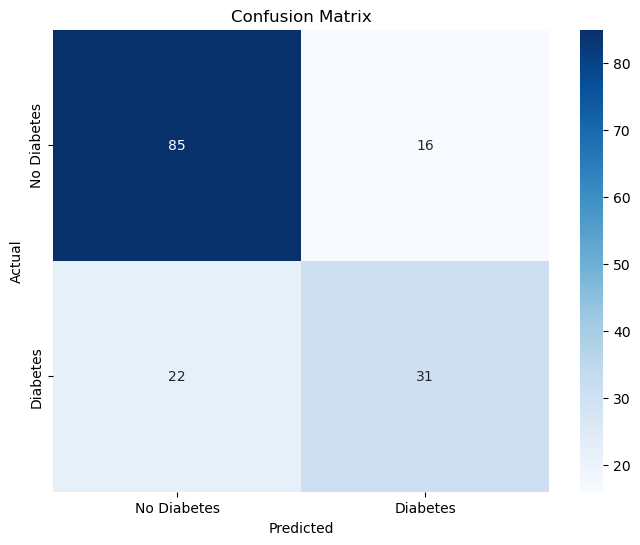

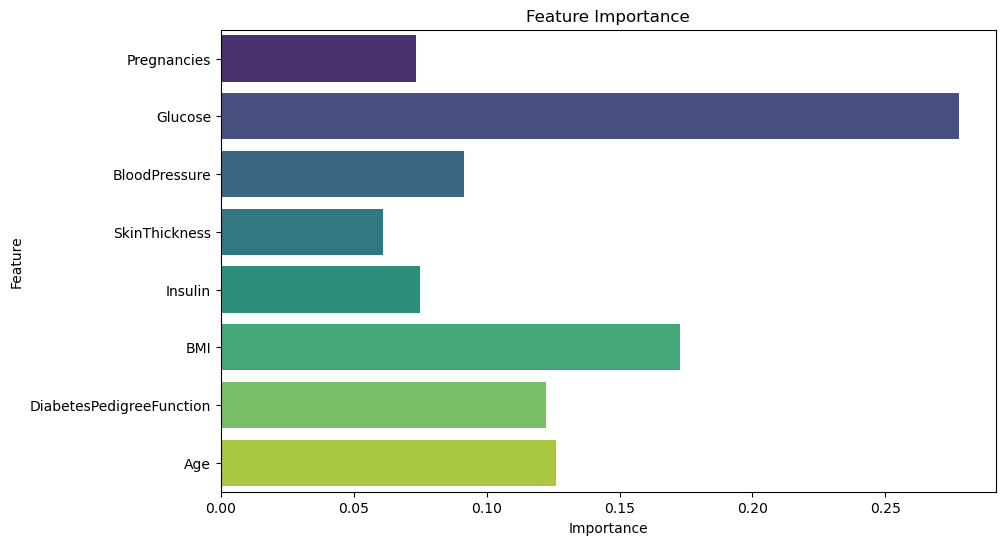

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file without a header
data = pd.read_csv('diabetes.csv', header=None)

# Split the single column into multiple columns using commas
# This is necessary if the CSV file is a single-column file with comma-separated values
data = data[0].str.split(',', expand=True)

# Assign proper column names to the DataFrame
# These names are used to identify and access each feature and the target variable
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Convert all columns to numeric, replacing non-numeric values with NaN
# Then, fill NaN values with the median of each column to handle missing data
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.median(), inplace=True)

# Display the first few rows of the DataFrame to ensure data is loaded and cleaned correctly
print(data.head())

# Define features (X) by dropping the target column 'Outcome'
# Define target (y) as the 'Outcome' column
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
# 80% of the data is used for training, and 20% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing datasets
# This provides information on how many samples are used for training and testing
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Initialize the Random Forest Classifier model with 100 trees and a random state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report showing precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix to show the counts of true and false positives/negatives
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Visualize Feature Importance as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
